In [1]:
import pandas as pd
import numpy as np

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [11]:
users=pd.read_csv("C:Downloads/ml-100k/u.user",sep='|',names=u_cols)
ratings = pd.read_csv('C:Downloads/ml-100k/u.data',sep='\t', names=r_cols)
movies = pd.read_csv('C:Downloads/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5) , encoding= 'latin-1')

In [12]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [13]:
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [18]:
movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [17]:
df

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


In [19]:
movielens=pd.merge(users,ratings,on = 'user_id')
movielens=pd.merge(movielens,movies,on = 'movie_id')
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [24]:
mv = movielens.groupby('title')['rating'].agg(['count','mean']).sort_values(by = 'mean',ascending = False)

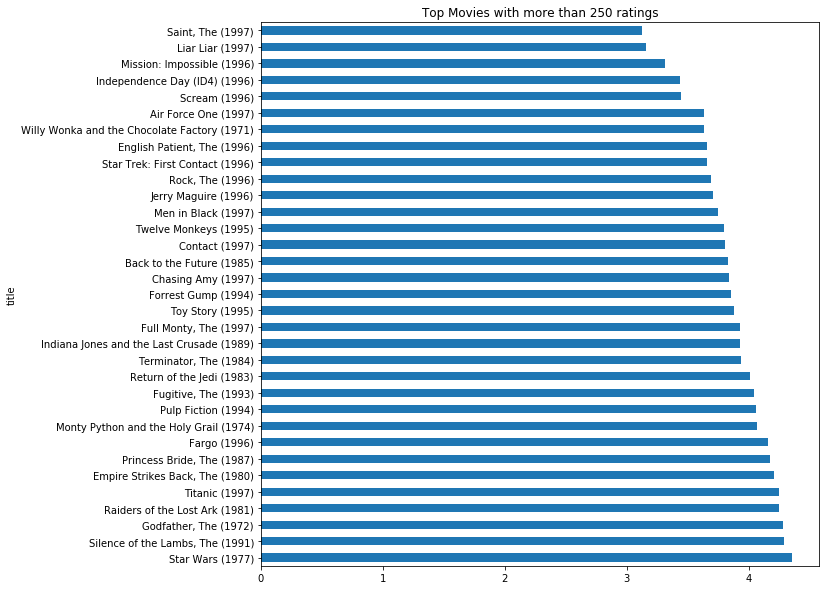

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
mv.query('count > 300')['mean'].plot(kind = 'barh')
plt.title("Top Movies with more than 250 ratings")
plt.show()

In [46]:
names= ['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',
              'Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
              'Thriller','War','Western']

In [51]:
movies = pd.read_csv(r'C:Downloads\ml-100k\u.item',sep = '|',encoding = 'latin-1', names=names)

In [53]:
def movie_score(movie_features,user_preferences):
    return sum([ i*j for i,j in zip(movie_features, user_preferences)])

In [66]:
###For GoldenEye

movies.iloc[1][6:].to_frame()

,1
Action,1
Adventure,1
Animation,0
Childrens,0
Comedy,0
Crime,0
Documentary,0
Drama,0
Fantasy,0
Film-Noir,0


In [63]:
movies_cateogary = movies.columns[6:]

movies_cateogary

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [64]:
from collections import OrderedDict
##Manually using preferences for some user , we can change it according to our needs 
user_preferences = OrderedDict(zip(movies_cateogary, []))

user_preferences['Action'] = 5  
user_preferences['Adventure'] = 5  
user_preferences['Animation'] = 1  
user_preferences["Childrens"] = 2  
user_preferences["Comedy"] = 3  
user_preferences['Crime'] = 2  
user_preferences['Documentary'] = 1  
user_preferences['Drama'] = 1  
user_preferences['Fantasy'] = 1  
user_preferences['Film-Noir'] = 1  
user_preferences['Horror'] = 2  
user_preferences['Musical'] = 1  
user_preferences['Mystery'] = 3  
user_preferences['Romance'] = 1  
user_preferences['Sci-Fi'] = 5  
user_preferences['War'] = 3  
user_preferences['Thriller'] = 5 
user_preferences['Western'] =1

In [65]:
user_preferences

OrderedDict([('Action', 5),
             ('Adventure', 5),
             ('Animation', 1),
             ('Childrens', 2),
             ('Comedy', 3),
             ('Crime', 2),
             ('Documentary', 1),
             ('Drama', 1),
             ('Fantasy', 1),
             ('Film-Noir', 1),
             ('Horror', 2),
             ('Musical', 1),
             ('Mystery', 3),
             ('Romance', 1),
             ('Sci-Fi', 5),
             ('War', 3),
             ('Thriller', 5),
             ('Western', 1)])

In [69]:
movie_score(movies.iloc[3][6:].to_frame(), user_preferences.values()) 

15

In [74]:
movies['score']=movies[movies_cateogary].apply(movie_score , args=([user_preferences.values()]), axis=1)

In [ ]:
movies['mo']

In [78]:
movies[['movie title','score']].sort_values(by ='score',ascending = False)

,movie title,score
171,"Empire Strikes Back, The (1980)",22
425,"Transformers: The Movie, The (1986)",21
180,Return of the Jedi (1983),21
49,Star Wars (1977),21
270,Starship Troopers (1997),20
...,...,...
1194,Strawberry and Chocolate (Fresa y chocolate) (...,1
1195,"Savage Nights (Nuits fauves, Les) (1992)",1
1681,Scream of Stone (Schrei aus Stein) (1991),1
266,unknown,0


In [84]:
rtg = movielens[['user_id','rating','title']].pivot_table(values='rating', index='user_id', columns='title')

In [86]:
rtg.fillna(0 , inplace = True)

In [87]:
rtg

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
corr_matrix = np.corrcoef(rtg.T)  
corr_matrix.shape

(1664, 1664)

In [90]:
corr_matrix

array([[ 1.        , -0.00588403, -0.00459452, ..., -0.00672091,
         0.10262212, -0.00296339],
       [-0.00588403,  1.        , -0.00682745, ...,  0.07524336,
         0.03650552, -0.00210783],
       [-0.00459452, -0.00682745,  1.        , ...,  0.15726789,
         0.01689268, -0.01096764],
       ...,
       [-0.00672091,  0.07524336,  0.15726789, ...,  1.        ,
        -0.00692669, -0.00240762],
       [ 0.10262212,  0.03650552,  0.01689268, ..., -0.00692669,
         1.        , -0.00305413],
       [-0.00296339, -0.00210783, -0.01096764, ..., -0.00240762,
        -0.00305413,  1.        ]])

In [91]:
movie_index = rtg.columns

In [94]:
movie_index

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)

In [97]:
list(movie_index).index('Á köldum klaka (Cold Fever) (1994)')

1663

In [106]:

favoured_movie_title = 'Pulp Fiction (1994)'

favoured_movie_index = list(movie_index).index(favoured_movie_title)

P = corr_matrix[favoured_movie_index]


#only return those movies with a high correlation with Toy Story
list(movie_index[(P>0.5)])

['Back to the Future (1985)',
 'Fugitive, The (1993)',
 'Get Shorty (1995)',
 'GoodFellas (1990)',
 'Pulp Fiction (1994)',
 'Raiders of the Lost Ark (1981)',
 'Seven (Se7en) (1995)',
 'Silence of the Lambs, The (1991)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Usual Suspects, The (1995)']

In [102]:
P

array([ 0.02102282,  0.03248044,  0.05176816, ..., -0.04006571,
        0.02746328,  0.01987796])